In [44]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Remove duplicates from city_data
city_data = city_data.drop_duplicates("city", keep="first")

# Combine the data into a single dataset
data_final = pd.merge(ride_data, city_data, how="left", on="city")


# Display the data table for preview
data_final.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

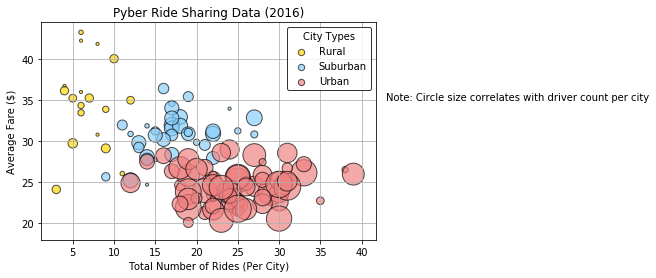

In [45]:
# Obtain the x and y coordinates for each of the three city types
grouped_cities = data_final.groupby("city")
avg_fare = grouped_cities.mean()["fare"]
drivers = grouped_cities.mean()["driver_count"]
ride_count = grouped_cities["ride_id"].count()
city_type = city_data.set_index("city")["type"]

# New dataframe with indexed information
city_df = pd.DataFrame({"Number of Drivers": drivers,
                        "Average Fare": avg_fare,
                        "Ride Count": ride_count,
                        "City Type": city_type})
city_df.head()

# Build the scatter plots for each city types:
# Rural scatter data
rural = city_df[city_df["City Type"] == "Rural"]
plt.scatter(rural["Ride Count"], rural["Average Fare"], s=rural["Number of Drivers"]*10,
           edgecolor="black", alpha=0.68, color="gold", linewidths=1.0, label="Rural")

# Suburban scatter data
suburban = city_df[city_df["City Type"] == "Suburban"]
plt.scatter(suburban["Ride Count"], suburban["Average Fare"], s=suburban["Number of Drivers"]*10,
           edgecolor="black", alpha=0.68, color="lightskyblue", linewidths=1.0, label="Suburban")

# Urban scatter data
urban = city_df[city_df["City Type"] == "Urban"]
plt.scatter(urban["Ride Count"], urban["Average Fare"], s=urban["Number of Drivers"]*10,
           edgecolor="black", alpha=0.68, color="lightcoral", linewidths=1.0, label="Urban")
    
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
scatter_legend = plt.legend(title="City Types", edgecolor="black")
scatter_legend.legendHandles[0]._sizes=[40]
scatter_legend.legendHandles[1]._sizes=[40]
scatter_legend.legendHandles[2]._sizes=[40]

# Incorporate a text label regarding circle size
plt.text(s="Note: Circle size correlates with driver count per city", y=35, x=43)

# Save Figure
plt.savefig("pyber_scatter_output.png", bbox_inches="tight")

In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

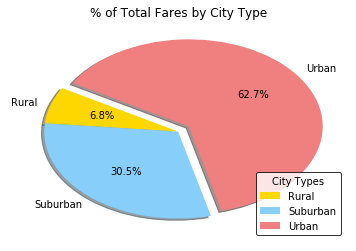

In [46]:
# Calculate Type Percents
total_fare_df = data_final.groupby("type")["fare", "type"]
fares = total_fare_df.sum()["fare"]

# Build Pie Chart
labels= ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(fares, colors=colors, explode=explode, labels=labels,
       autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
leg = plt.legend(title="City Types", edgecolor="black", loc="lower right")
leg.legendHandles[0]._sizes=[40]
leg.legendHandles[1]._sizes=[40]
leg.legendHandles[2]._sizes=[40]

# Save Figure
plt.savefig("pyber_piechart_output1.png", bbox_inches="tight")

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

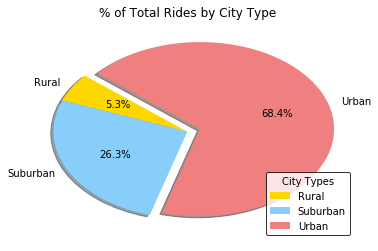

In [47]:
# Calculate Ride Percents
ride_count_df = data_final.groupby("type")["ride_id"]
rides = ride_count_df.count()

# Build Pie Chart
plt.pie(rides, colors=colors, explode=explode, labels=labels,
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
leg = plt.legend(title="City Types", edgecolor="black", loc="lower right")
leg.legendHandles[0]._sizes=[40]
leg.legendHandles[1]._sizes=[40]
leg.legendHandles[2]._sizes=[40]

# Save Figure
plt.savefig("pyber_piechart_output2.png", bbox_inches="tight")

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

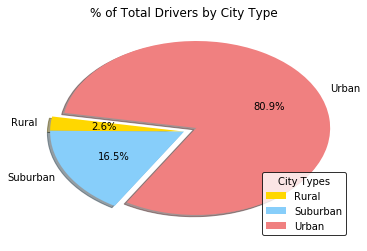

In [48]:
# Calculate Driver Percents
# Drop duplicate records with the same city name
dc_df = data_final.drop_duplicates("city", keep="first")

drivers_count_df = dc_df.groupby("type")
drivers_total = drivers_count_df.sum()["driver_count"]

# Build Pie Charts
plt.pie(drivers_total, colors=colors, explode=explode, labels=labels,
       autopct="%1.1f%%", shadow=True, startangle=170)
plt.title("% of Total Drivers by City Type")
leg = plt.legend(title="City Types", edgecolor="black", loc="lower right")
leg.legendHandles[0]._sizes=[40]
leg.legendHandles[1]._sizes=[40]
leg.legendHandles[2]._sizes=[40]

# Save Figure
plt.savefig("pyber_piechart_output3.png", bboxinches="tight")

In [ ]:
# Show Figure
plt.show()